In [2]:
# Import the necessary library we need for our data preparation: pandas package:
import pandas as pd

In [4]:
# Read in csv file containing data from consumer survey:
area = pd.read_csv('data/organic_croparea_eu.csv')

In [5]:
# Show dataframe:
area

,DATAFLOW,LAST UPDATE,freq,unit,crops,agprdmet,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,HA,UAAXK0000,TOTAL,AL,2021,1097,NaN
1,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,HA,UAAXK0000,TOTAL,AT,2013,526689,NaN
2,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,HA,UAAXK0000,TOTAL,AT,2014,525521,NaN
3,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,HA,UAAXK0000,TOTAL,AT,2015,552141,NaN
4,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,HA,UAAXK0000,TOTAL,AT,2016,571423,NaN
...,...,...,...,...,...,...,...,...,...,...
319,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,HA,UAAXK0000,TOTAL,UK,2015,495929,NaN
320,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,HA,UAAXK0000,TOTAL,UK,2016,490205,NaN
321,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,HA,UAAXK0000,TOTAL,UK,2017,497742,NaN
322,ESTAT:ORG_CROPAR(1.0),14/02/24 23:00:00,A,HA,UAAXK0000,TOTAL,UK,2018,457378,NaN


In [6]:
# Show dataframe info:
area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATAFLOW     324 non-null    object
 1   LAST UPDATE  324 non-null    object
 2   freq         324 non-null    object
 3   unit         324 non-null    object
 4   crops        324 non-null    object
 5   agprdmet     324 non-null    object
 6   geo          324 non-null    object
 7   TIME_PERIOD  324 non-null    int64 
 8   OBS_VALUE    324 non-null    int64 
 9   OBS_FLAG     11 non-null     object
dtypes: int64(2), object(8)
memory usage: 25.4+ KB


In [24]:
unique_item = area['unit'].value_counts()
print(unique_item)

unit
HA    324
Name: count, dtype: int64


In [40]:
organic_croparea_eu = area.drop(['DATAFLOW', 'LAST UPDATE','freq','crops','agprdmet','OBS_FLAG','unit'], axis=1)
organic_croparea_eu

,geo,TIME_PERIOD,OBS_VALUE
0,AL,2021,1097
1,AT,2013,526689
2,AT,2014,525521
3,AT,2015,552141
4,AT,2016,571423
...,...,...,...
319,UK,2015,495929
320,UK,2016,490205
321,UK,2017,497742
322,UK,2018,457378


In [42]:
organic_croparea_eu = organic_croparea_eu.rename(columns={'geo': 'country_ID', 'TIME_PERIOD': 'year',
                                         'OBS_VALUE': 'HA_1000'})
organic_croparea_eu


,country_ID,year,HA_1000
0,AL,2021,1097
1,AT,2013,526689
2,AT,2014,525521
3,AT,2015,552141
4,AT,2016,571423
...,...,...,...
319,UK,2015,495929
320,UK,2016,490205
321,UK,2017,497742
322,UK,2018,457378


<BarContainer object of 324 artists>

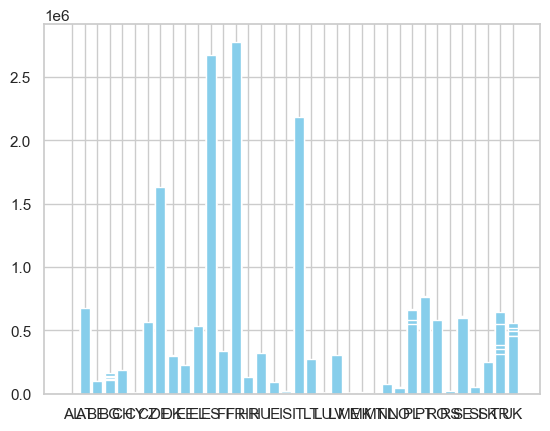

In [43]:
# Let's make a diagram, for this we import library matplotlib
import matplotlib.pyplot as plt

plt.bar(organic_croparea_eu['country_ID'], organic_croparea_eu['HA_1000'], color='skyblue')

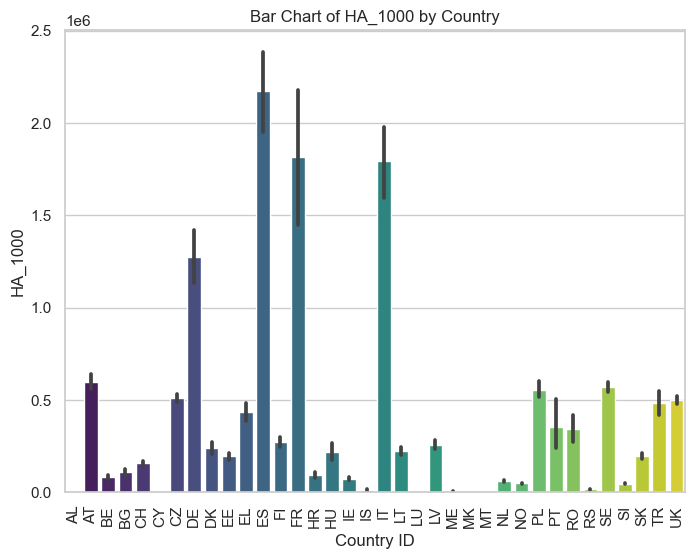

In [52]:
# import seaborn
import seaborn as sns
# setting the style seaborn
sns.set(style="whitegrid")
# building a barchart using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='country_ID', y='HA_1000', data=organic_croparea_eu, palette='viridis')
plt.xlabel('Country ID')
plt.ylabel('HA_1000')
plt.title('Bar Chart of HA_1000 by Country')
plt.xticks(rotation=90)
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


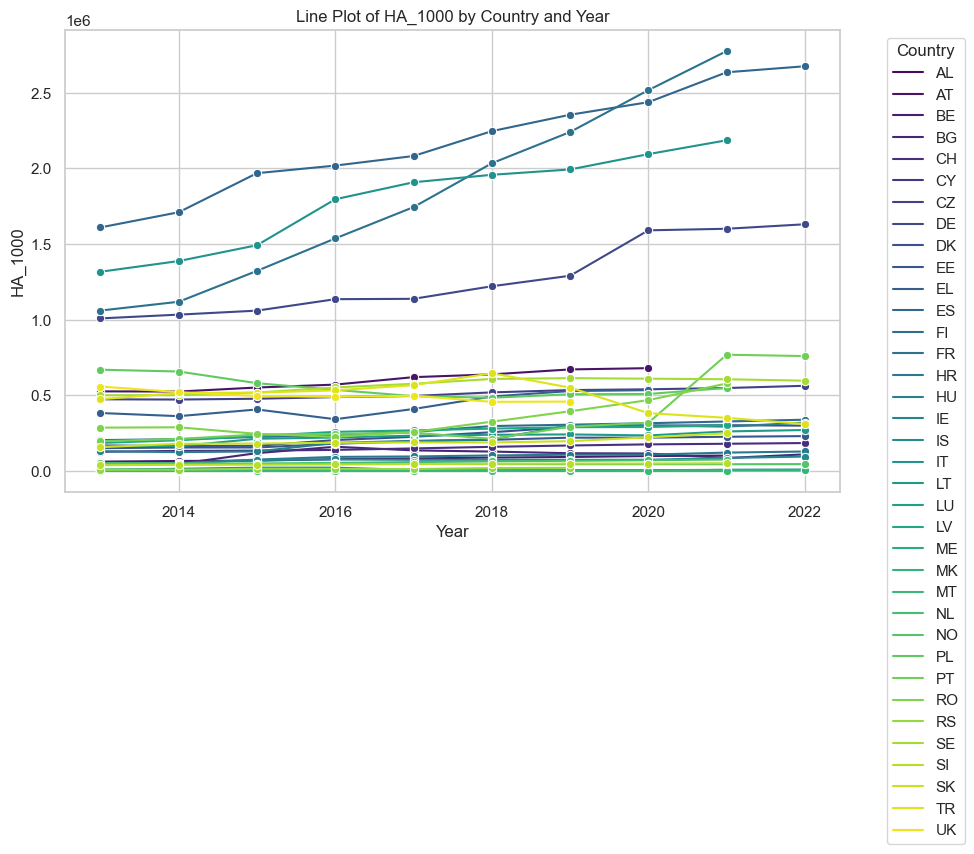

In [54]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='HA_1000', hue='country_ID', data=organic_croparea_eu, palette='viridis', marker='o')
plt.xlabel('Year')
plt.ylabel('HA_1000')
plt.title('Line Plot of HA_1000 by Country and Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# We now want to upload the dataframe to the database on the server.

In [45]:
# Import sql_functions.py because we need some functions from that module:
import sql_functions as sqlf

# We need to restart the kernel and rerun at this point if we changed the 
# module since we first imported it.

In [46]:
# Create a variable called engine using the get_engine function:
engine = sqlf.get_engine()

In [48]:
# We set the schema to our course name:
schema = 'capstone_organicfood'

# We set the table_name variable to our group name + the name of the dataframe:
table_name = 'organic_croparea_eu'

In [49]:
# We need psycopg2 for raising possible error message:
import psycopg2

In [50]:
# Write records stored in the dataframe to SQL database:
if engine!=None:
    try:
        organic_croparea_eu.to_sql(name=table_name, # name of SQL table variable
                        con=engine, # engine or connection
                        schema=schema, # our class schema variable
                        if_exists='replace', # Drop the table before inserting new values
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None
else:
    print('No engine')

The organic_croparea_eu table was imported successfully.


In [51]:
# Test: query the newly created table to count the rows (we know from above that the dataframe has 108 cases):
sqlf.get_dataframe(f'SELECT COUNT(*) FROM {schema}.organic_croparea_eu;')

,count
0,324
